In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
y=pd.read_csv("label.csv",header=None)
X=np.loadtxt("Kmer5.txt")
X.shape

(173, 1024)

In [7]:
Standard_X=np.array(X)
Standard_Y=np.array(y)

In [8]:
cv=LeaveOneOut()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

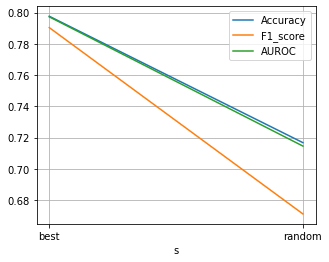

In [10]:
accuracy_a=[]
f1_a=[]
auroc_a=[]
param1=["best","random"]
for i in param1:
    Predict_Y=[]    
    Prob_Y=[]       
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=DecisionTreeClassifier(random_state=10,splitter=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  
    Prob_Y=Prob_Y.reshape(173,2)  
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_a.append(ACC)
    f1_a.append(F1_score)
    auroc_a.append(AUC)
plt.figure(figsize=(5,4))
plt.plot(param1,accuracy_a,label="Accuracy")
plt.plot(param1,f1_a,label="F1_score")
plt.plot(param1,auroc_a,label="AUROC")
plt.xlabel("s")
plt.legend()
plt.grid()
plt.show()

In [11]:
accuracy_b=[]
f1_b=[]
auroc_b=[]
param2=np.array(range(3,10,1))
for i in param2:
    Predict_Y=[]    
    Prob_Y=[]      
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=DecisionTreeClassifier(splitter="best",random_state=10,max_depth=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y) 
    Prob_Y=Prob_Y.reshape(173,2)  
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_b.append(ACC)
    f1_b.append(F1_score)
    auroc_b.append(AUC)

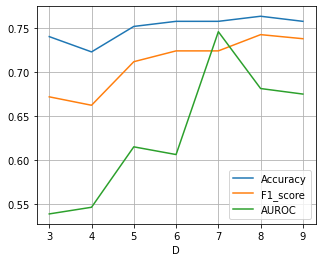

In [12]:
plt.figure(figsize=(5,4))
plt.plot(param2,accuracy_b,label="Accuracy")
plt.plot(param2,f1_b,label="F1_score")
plt.plot(param2,auroc_b,label="AUROC")
plt.xlabel("D")
plt.legend()
plt.grid()
plt.show()

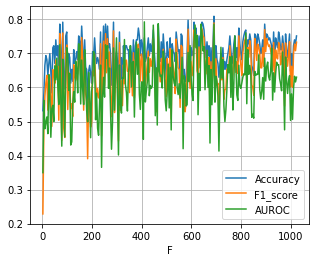

In [15]:

plt.figure(figsize=(5,4))
plt.plot(np.array(range(3,param3,4)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,param3,4)),f1_c,label="F1_score")
plt.plot(np.array(range(3,param3,4)),auroc_c,label="AUROC")
plt.xlabel("F")
plt.legend()
plt.grid()
plt.show()

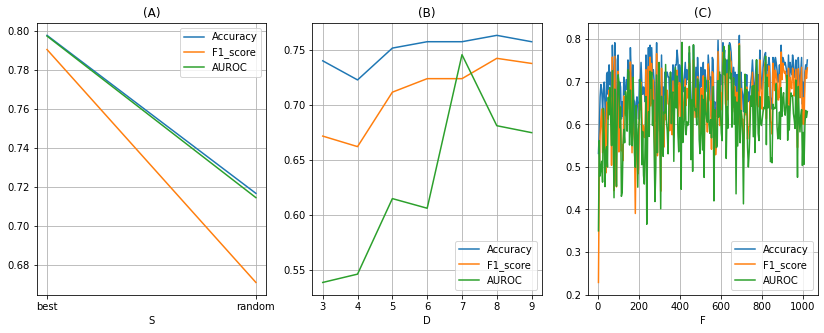

In [17]:
plt.figure(figsize=(14,5))
#plt.title('Mismatch')

plt.subplot(131)
#plt.figure(figsize=(5,4))
plt.plot(param1,accuracy_a,label="Accuracy")
plt.plot(param1,f1_a,label="F1_score")
plt.plot(param1,auroc_a,label="AUROC")
plt.xlabel("S")
plt.legend()
plt.title('(A)')
plt.grid()
#plt.show()
plt.subplot(132)
#plt.figure(figsize=(5,4))
plt.plot(param2,accuracy_b,label="Accuracy")
plt.plot(param2,f1_b,label="F1_score")
plt.plot(param2,auroc_b,label="AUROC")
plt.xlabel("D")
plt.legend()
plt.title('(B)')
plt.grid()


plt.subplot(133)
#plt.figure(figsize=(5,4))
plt.plot(np.array(range(3,param3,4)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,param3,4)),f1_c,label="F1_score")
plt.plot(np.array(range(3,param3,4)),auroc_c,label="AUROC")
plt.xlabel("F")
plt.legend()
plt.grid()
plt.title('(C)')

#plt.show()

plt.savefig("./4.tif",dpi=300)
plt.savefig("./4.svg",dpi=300)
plt.savefig("./4.png",dpi=300)

In [20]:
Predict_Y=[]    #存放预测值
Prob_Y=[]       #存放预测概率
Really_Y=Standard_Y
for train_index,test_index in cv.split(Standard_X):
    estimator=DecisionTreeClassifier(splitter="best",random_state=10,max_depth=8,max_features=204)
    estimator.fit(Standard_X[train_index],Standard_Y[train_index])
    Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
    Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
import pandas as pd
Prob_Y=pd.DataFrame(Prob_Y)
Prob_Y.columns=["0","1"]
confusion_matrix(Really_Y,Predict_Y)
ACC=accuracy_score(Really_Y,Predict_Y)
F1_score=f1_score(Really_Y,Predict_Y)
AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
print(ACC)
print(F1_score)
print(AUC)

0.791907514450867
0.7534246575342466
0.8346256684491978
